In [1]:
%pip install pandas numpy matplotlib seaborn scikit-learn xgboost

   ---------------------------------------- 0.0/56.8 MB ? eta -:--:--
   ---------------------------------------- 0.3/56.8 MB ? eta -:--:--
    --------------------------------------- 1.0/56.8 MB 3.8 MB/s eta 0:00:15
   - -------------------------------------- 1.8/56.8 MB 3.2 MB/s eta 0:00:18
   -- ------------------------------------- 2.9/56.8 MB 3.8 MB/s eta 0:00:15
   -- ------------------------------------- 3.7/56.8 MB 3.8 MB/s eta 0:00:14
   --- ------------------------------------ 4.5/56.8 MB 3.8 MB/s eta 0:00:14
   --- ------------------------------------ 5.5/56.8 MB 3.8 MB/s eta 0:00:14
   ---- ----------------------------------- 6.3/56.8 MB 3.8 MB/s eta 0:00:14
   ---- ----------------------------------- 7.1/56.8 MB 3.8 MB/s eta 0:00:13
   ----- ---------------------------------- 7.9/56.8 MB 3.9 MB/s eta 0:00:13
   ------ --------------------------------- 8.7/56.8 MB 3.8 MB/s eta 0:00:13
   ------ --------------------------------- 9.2/56.8 MB 3.8 MB/s eta 0:00:13
   ------- --


[notice] A new release of pip is available: 24.2 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
# 1. Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.feature_selection import RFE, chi2, SelectKBest
from sklearn.preprocessing import MinMaxScaler


In [5]:
# 2. Load Cleaned Dataset
df = pd.read_csv("D:/Omar/Projects/Ai/Sprints/Heart_Disease_Project/data/cleaned_heart.csv")
X = df.drop("target", axis=1)
y = df["target"]

print("Dataset shape:", X.shape)


Dataset shape: (303, 20)


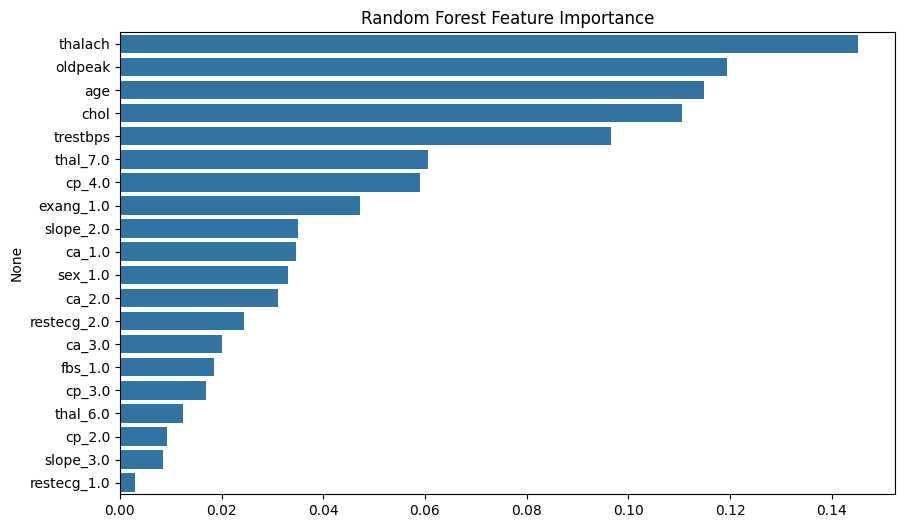

In [6]:
# 3. Feature Importance using Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X, y)

importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x=importances[indices], y=X.columns[indices])
plt.title("Random Forest Feature Importance")
plt.show()


In [ ]:
# 4. Recursive Feature Elimination
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)
rfe = RFE(model, n_features_to_select=10)  # keep top 10 predictors
rfe.fit(X, y)

selected_features_rfe = X.columns[rfe.support_]
print("Selected features by RFE:", list(selected_features_rfe))


Selected features by RFE: ['oldpeak', 'cp_4.0', 'fbs_1.0', 'restecg_2.0', 'slope_2.0', 'ca_1.0', 'ca_2.0', 'ca_3.0', 'thal_6.0', 'thal_7.0']


In [ ]:
# 5. Chi-Square Test
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

chi2_selector = SelectKBest(score_func=chi2, k=10)
chi2_selector.fit(X_scaled, y)

selected_features_chi2 = X.columns[chi2_selector.get_support()]
print("Selected features by Chi-Square:", list(selected_features_chi2))


Selected features by Chi-Square: ['oldpeak', 'cp_2.0', 'cp_3.0', 'cp_4.0', 'exang_1.0', 'slope_2.0', 'ca_1.0', 'ca_2.0', 'ca_3.0', 'thal_7.0']


In [14]:
# 7. Combine and Save Final Feature Set
final_features = set(selected_features_rfe).union(set(selected_features_chi2))
print("Final selected features:", final_features)

df_reduced = df[list(final_features) + ["target"]]
df_reduced.to_csv("reduced_heart.csv", index=False)

print("Reduced dataset saved as 'reduced_heart.csv'")


Final selected features: {'ca_2.0', 'restecg_2.0', 'thal_6.0', 'thal_7.0', 'exang_1.0', 'fbs_1.0', 'ca_1.0', 'oldpeak', 'cp_3.0', 'cp_4.0', 'cp_2.0', 'ca_3.0', 'slope_2.0'}
Reduced dataset saved as 'reduced_heart.csv'
